<a href="https://colab.research.google.com/github/yamininekkanti/Books-Recommendor-systems/blob/master/Klaviyo_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yamini nekkanti;
Email:yamini.nekkanti1@gmail.com


In [42]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [43]:
url = 'https://raw.githubusercontent.com/yamininekkanti/Klav_DS_Test/master/screening_exercise_orders_v201810.csv'
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [44]:
df.date = pd.to_datetime(df.date)

## A) Assemble a dataframe with one row per customer and the following columns:

* customer_id
* gender
* most_recent_order_date
* order_count (number of orders placed by this customer)
 

Sort the dataframe by customer_id ascending and display the first 10 rows.


In [45]:
df1 = df.groupby('customer_id').agg({'gender' : [('Gender','mean')],'date': [('most_recent_order_date','max'), ('order_count','count')]})

In [46]:
df1.columns=df1.columns.droplevel(0)

In [47]:
df1 = df1.reset_index().sort_values(["customer_id"], ascending = (True))

In [48]:
df1.head(10)

,customer_id,Gender,most_recent_order_date,order_count
0,1000,0,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,1
2,1002,1,2017-02-19 21:35:31,3
3,1003,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,1
5,1005,1,2017-12-16 01:39:27,2
6,1006,1,2017-05-09 15:27:20,3
7,1007,0,2017-01-01 15:59:50,1
8,1008,0,2017-12-17 05:47:48,3
9,1009,1,2017-01-01 19:27:17,1


## B) Plot the count of orders per week for the store.

In [49]:
df2=df
df2["week_no"] = df["date"].dt.week
df3 = df2.groupby('week_no').agg({'value': [('order_count','count')]})
df3.columns=df3.columns.droplevel(0)
df3 = df3.reset_index()



<Figure size 1152x648 with 0 Axes>

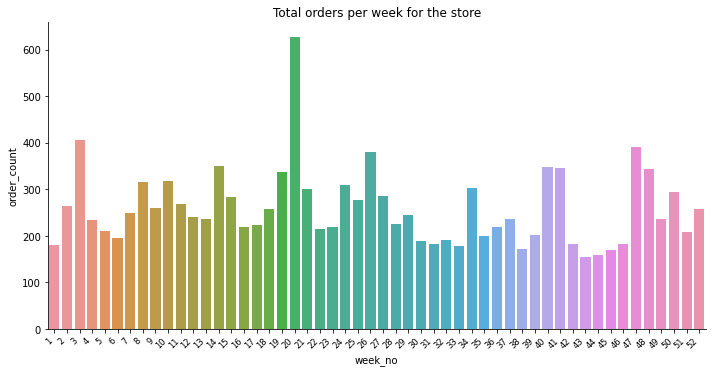

In [50]:

plt.figure(figsize=(16, 9));
sns.catplot(
    x="week_no",
    y = "order_count",
    kind="bar",
    data= df3,
    height=5,  # make the plot 5 units high
    aspect=2,
);
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="small"
);
plt.title('Total orders per week for the store');

## C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant? Justify your choice of method.


In [51]:
df.groupby('gender').agg({'value': [('Mean_order_value','mean')]})

,value
,Mean_order_value
gender,
0,363.890006
1,350.708361


In [53]:

ztest ,pval = stests.ztest(df[df['gender']==0].value, x2=df[df['gender']==1].value, value=0,alternative='two-sided')
print(float(pval))
print("Alpha value is assumed as 0.05")
if pval<0.05:
    print("reject null hypothesis. ")
else:
    print("accept null hypothesis or fail to reject null hypothesis.")

0.04818092815493747
Alpha value is assumed as 0.05
reject null hypothesis. 


The mean order values for gender=0 and gender=1 are 363.89 & 350.70 respectively. I have perfomred Z-value test to check for p-value with 95% confidence with null hypothesis that there is no significant difference between the means (alpha=0.05) . From the results we can see that p-value = 0.04816 lesser than 0.05 . Therefore, with 95% confidence I can reject this hypothesis, the difference is not significant.

## D) Generate a confusion matrix for the gender predictions of customers in this dataset. You can assume that there is only one gender prediction for each customer. What does the confusion matrix tell you about the quality of the predictions?


In [54]:

confusion_matrix(df.gender, df.predicted_gender)

array([[3349, 3410],
       [1463, 5249]])

In [55]:

Results=classification_report(df.gender, df.predicted_gender)

In [56]:
print(Results)

              precision    recall  f1-score   support

           0       0.70      0.50      0.58      6759
           1       0.61      0.78      0.68      6712

    accuracy                           0.64     13471
   macro avg       0.65      0.64      0.63     13471
weighted avg       0.65      0.64      0.63     13471



From the classification report we can infer that accuracy of our predictions is 64% and the precision with which we predicted the values is 61%. And the recall of the predictions is 78%


## E) Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem. Limit your answer to one paragraph, and please be specific.


My favorite tool is Python. It is very simple and easy to use interface for data cleaning,analysis and modelling. Especially python has more sophisticaed machine learning model libraries. I used python to build sales inventory recommendations system to predict the sales and required inventory levels. In addition to that matlab & seaborn visualization libraries in python provided me a good visualized display of sales variations across stores and geographies. Plots generated are very easy to interpret and insights aided the business problem of optimizing the inventory
 